In [3]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import re
from wordcloud import WordCloud
import contractions
import collections
import seaborn as sns
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import liwc

subreddit = 'conspiracy'
type_of_content = 'submissions'
column = 'title'

stop = nltk.corpus.stopwords.words('english')
tokenizer = nltk.RegexpTokenizer(r"\w+")
lemmatizer = nltk.WordNetLemmatizer()

(7806, 12)

read file and add title and selftext to process

In [45]:
filename = f'./data/{subreddit}_{type_of_content}_redditapi.csv'
dataframe = pd.read_csv(filename)
dataframe['self_text'] = dataframe['self_text'].apply(str)

selftexts = dataframe[['self_text']]
selftexts = selftexts.drop(selftexts.index[selftexts['self_text'] == '[deleted]'], axis=0, inplace=False)
selftexts = selftexts.drop(selftexts.index[selftexts['self_text'] == '[removed]'], axis=0, inplace=False)
selftexts = selftexts.drop(selftexts.index[selftexts['self_text'] == 'nan'], axis=0, inplace=False)
submissions = list(dataframe.title) + list(selftexts.self_text)

10026

In [67]:
preprocessed_submissions = []

for submission in submissions:
    submission = str(submission)
    submission = submission.lower()
    #source https://www.regextester.com/93652
    submission = re.sub(r"(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?","",submission)
    submission = re.sub(r"(@\[A-Za-z0-9]+)|(\w+:\/\/\S+)|^&gt;","",submission)
    submission = " ".join(contractions.fix(word) for word in submission.split())

    submission = re.sub(r"[^0-9A-Za-z \t]","",submission)
    submission = tokenizer.tokenize(submission)
    submission = ' '.join([lemmatizer.lemmatize(word, pos="v") for word in submission])
    preprocessed_submissions.append(submission)

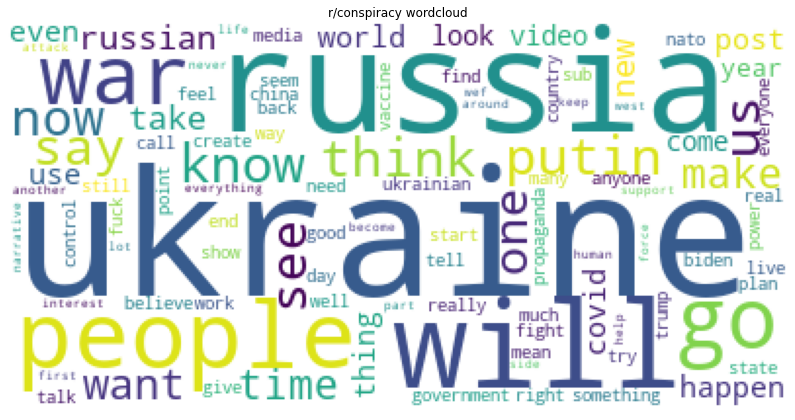

In [66]:
wordcloud_text = ''

for submission in preprocessed_submissions:
    for word in submission:
        wordcloud_text = wordcloud_text + word + ' '

wc = WordCloud(max_words=100, background_color='white').generate(wordcloud_text)
plt.figure(figsize = (14, 14))
plt.axis('off')
plt.title(f'r/{subreddit} wordcloud')
plt.imshow(wc)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer(stop_words=stop, ngram_range=(2,4), max_features=10000)
ngrams = countvec.fit_transform(preprocessed_submissions)
count_values = ngrams.toarray().sum(axis=0)
vocab = countvec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})
df_ngram.head()

,frequency,bigram/trigram
0,157,let us
1,123,great reset
2,120,russia ukraine
3,105,social media
4,103,look like
5,101,invade ukraine
6,101,feel like
7,100,anyone else
8,94,ukraine russia
9,86,world war
